In [1]:
import pandas as pd
import numpy as np

In [19]:
!pip install plotly

     |████████████████████████████████| 15.2 MB 6.1 MB/s eta 0:00:01


In [120]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.offline as py
from plotly import tools
import plotly.graph_objs as go

from sklearn import metrics

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [82]:
# Read Data from CSV File
url = "https://raw.githubusercontent.com/neha-mishra/Evaluation-Projects/main/Avacado_Project/avocado.csv"
df = pd.read_csv(url)

# Adjust index to start from 1 instead of 0
df.index += 1

In [83]:
# Drop column 'Unnamed' which is just index
df.drop("Unnamed: 0", axis=1,inplace=True)

# Rename Column Names
names = ['Date', 'AveragePrice', 'TotalVolume', 'Small', 'Large', 'XLarge', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type', 'Year' ,'Region']
df.rename(columns=dict(zip(df.columns, names)), inplace = True)

In [84]:
# Show top 5 rows of DataFrame
df.head()

,Date,AveragePrice,TotalVolume,Small,Large,XLarge,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region
1,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
3,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
4,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
5,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [85]:
# Check DataFrame Shape
df.shape

(18249, 13)

In [86]:
# Get datatypes of all columns
df.dtypes

Date             object
AveragePrice    float64
TotalVolume     float64
Small           float64
Large           float64
XLarge          float64
TotalBags       float64
SmallBags       float64
LargeBags       float64
XLargeBags      float64
Type             object
Year              int64
Region           object
dtype: object

In [87]:
# Get full info of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 1 to 18249
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   TotalVolume   18249 non-null  float64
 3   Small         18249 non-null  float64
 4   Large         18249 non-null  float64
 5   XLarge        18249 non-null  float64
 6   TotalBags     18249 non-null  float64
 7   SmallBags     18249 non-null  float64
 8   LargeBags     18249 non-null  float64
 9   XLargeBags    18249 non-null  float64
 10  Type          18249 non-null  object 
 11  Year          18249 non-null  int64  
 12  Region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [88]:
# Get Summery of DataFrame
df.describe(include='all')

,Date,AveragePrice,TotalVolume,Small,Large,XLarge,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,2015-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Albany
freq,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


In [89]:
# Get DataFrame of rows with missing data
null_data = df[df.isnull().any(axis=1)]
null_data

,Date,AveragePrice,TotalVolume,Small,Large,XLarge,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region


<AxesSubplot:>

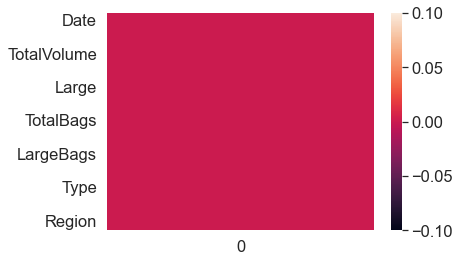

In [90]:
# Check DataFrame for null value
sns.heatmap(df.isnull().sum().to_frame())

# Data Visualization

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='AveragePrice'>

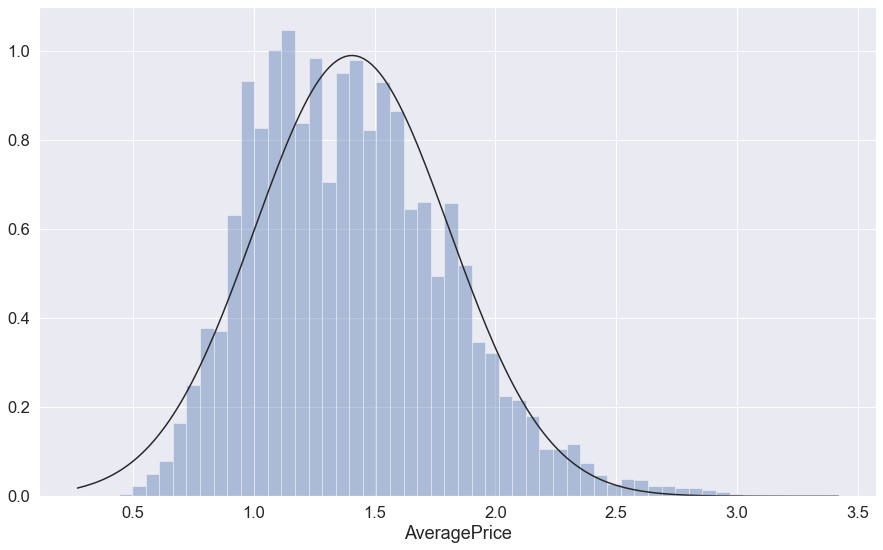

In [91]:
# Average Price
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

Text(0.5, 1.0, 'Avacado Type v/s Total Volumn')

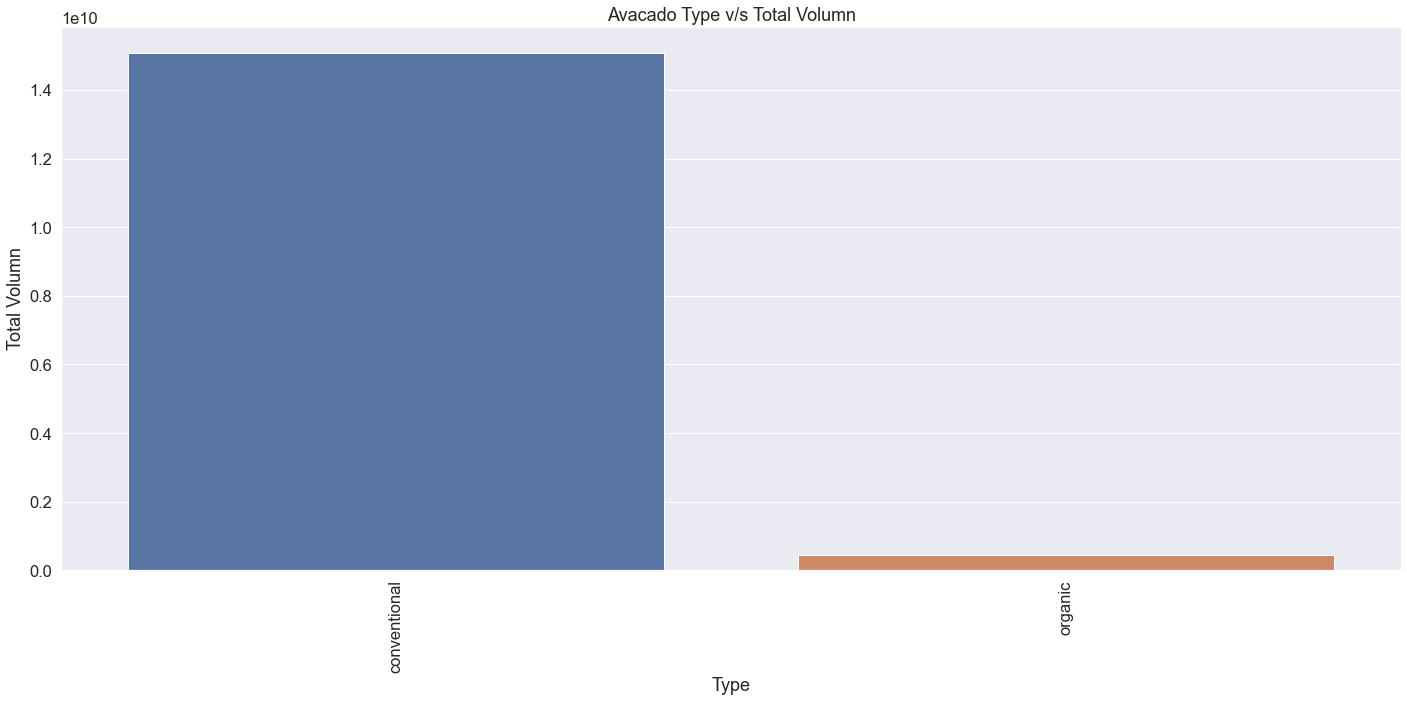

In [92]:
# Avacado Type v/s Total Volumn
type_list=list(df.Type.unique())
total_volumn=[]

for i in type_list:
    x=df[df.Type==i]
    type_volumn = sum(x.TotalVolume)
    total_volumn.append(type_volumn)

df1=pd.DataFrame({'type':type_list,'total_volumn':total_volumn})
new_index=df1.total_volumn.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.type,y=sorted_data.total_volumn)

plt.xticks(rotation=90)
plt.xlabel('Type')
plt.ylabel('Total Volumn')
plt.title('Avacado Type v/s Total Volumn')

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

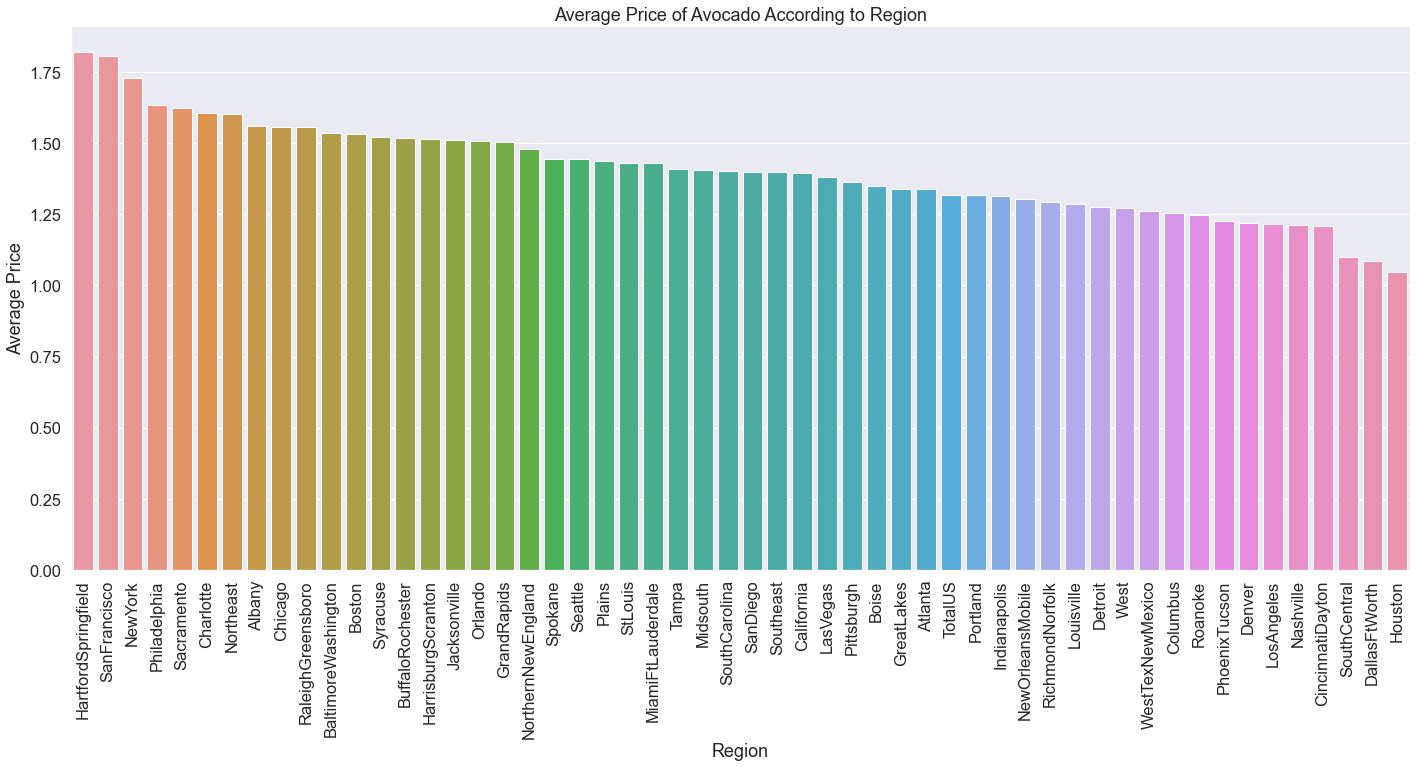

In [93]:
# Regions v/s Average price
region_list=list(df.Region.unique())
average_price=[]

for i in region_list:
    x=df[df.Region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Text(0.5, 1.0, 'Average of Total Volume According to Region')

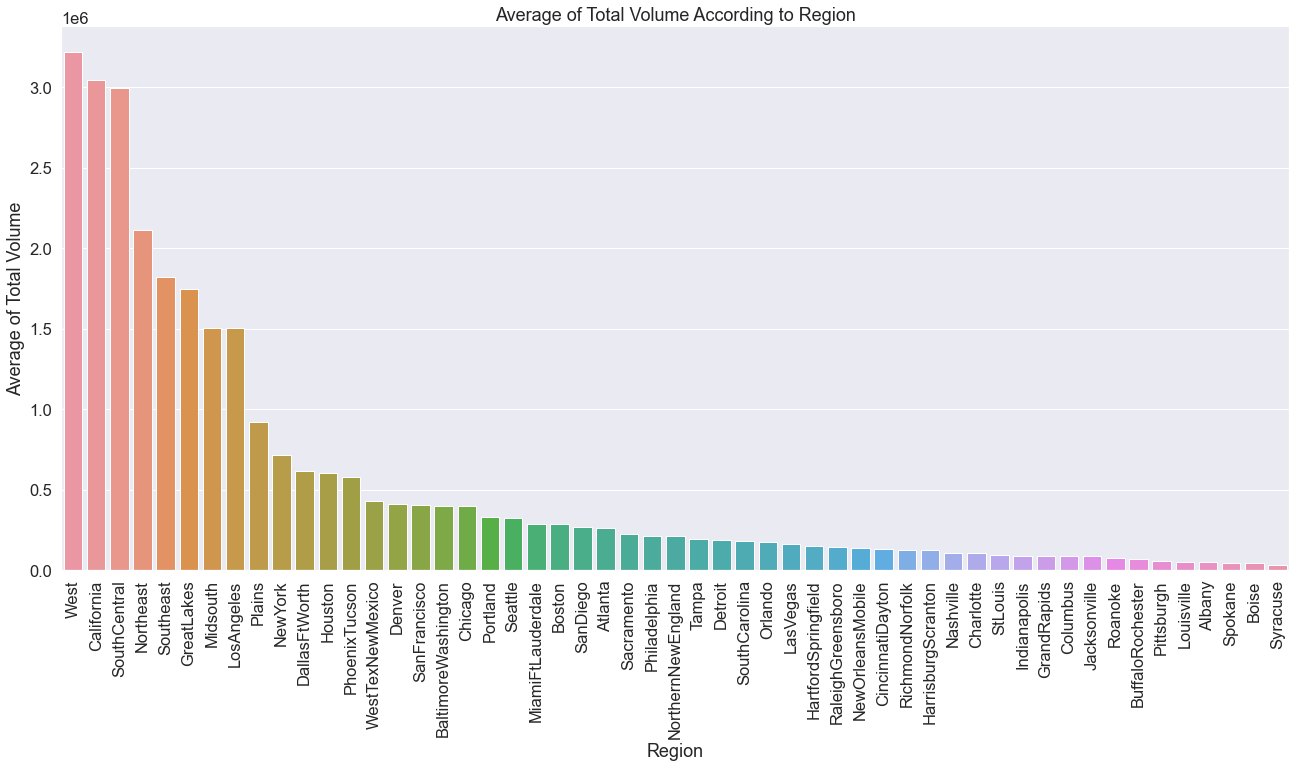

In [94]:
# Regions v/s Average Consumption
filter1=df.Region!='TotalUS'
df1=df[filter1]

region_list=list(df1.Region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.Region==i]
    average_total_volume.append(sum(x['TotalVolume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3723: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



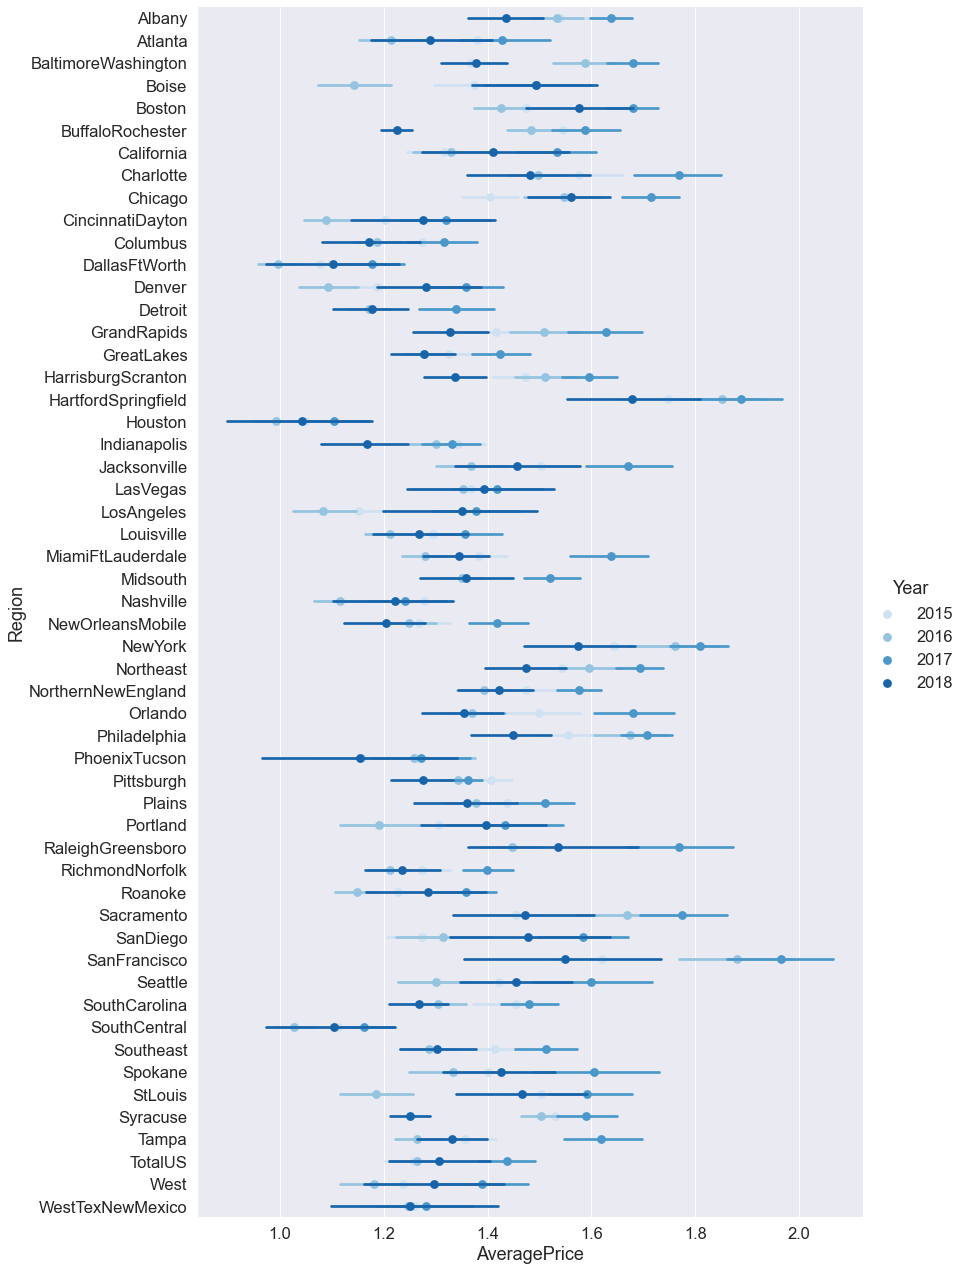

In [95]:
# Regionwise Yearly Average Price
g = sns.factorplot('AveragePrice','Region',data=df,
                   hue='Year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

<AxesSubplot:>

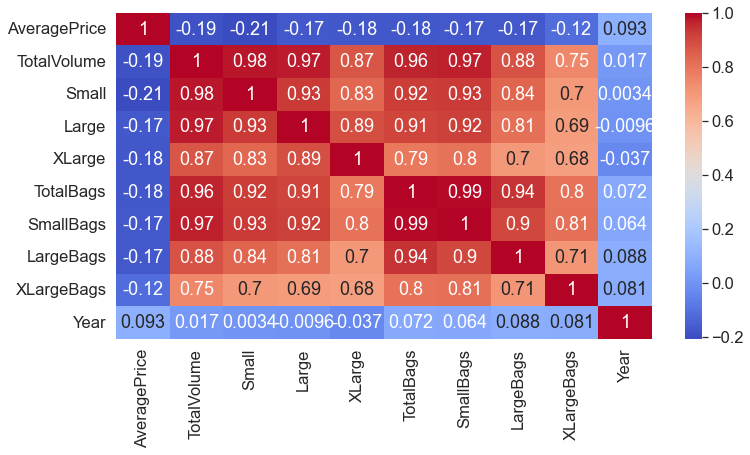

In [96]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [103]:
# Convert Avacado Types from [conventional, organic] to [0, 1]

label = LabelEncoder()
dicts = {}

label.fit(df.Type.drop_duplicates()) 
dicts['type'] = list(label.classes_)
df.Type = label.transform(df.Type)

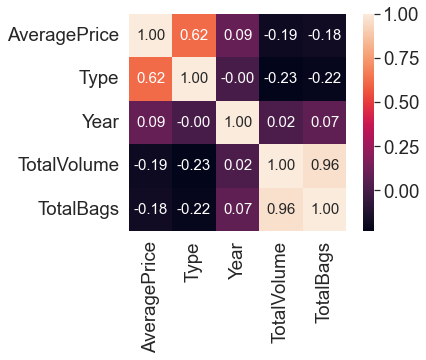

In [106]:
cols = ['AveragePrice','Type','Year','TotalVolume','TotalBags']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

Classifying Type of Avocado

#### Logistic Regression

In [108]:
X=df[['AveragePrice', 'Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags']] #feature columns
y=df.Type #predictor variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (14599, 7)
Y Train Shape  (14599,)
X Test Shape  (3650, 7)
Y Test Shape  (3650,)


Accuracy score for Logistic Regression test data is: 0.9402739726027397
----------------------------------------------------------------------------------------
Confusion matrix for logistic regression model
              Predicted organic  Predicted Conventional
organic                    1664                     184
Conventional                 34                    1768
----------------------------------------------------------------------------------------


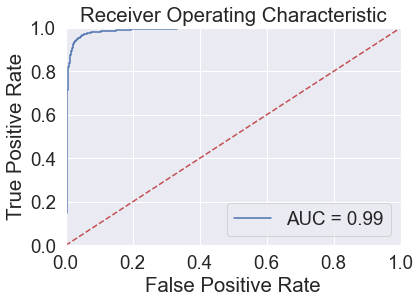

In [115]:
#Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred_train = logreg.predict(X_train)  
y_pred_test = logreg.predict(X_test)  

#Acuuracy score
print('Accuracy score for Logistic Regression test data is:', accuracy_score(y_test,y_pred_test))

print('----------------------------------------------------------------------------------------')

#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for logistic regression model")
print(confusion_matrix)

print('----------------------------------------------------------------------------------------')

#AUC ROC Curve
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Random forest classifier

Accuracy score for test data using Random Forest : 0.996986301369863
----------------------------------------------------------------------------------------
Confusion matrix for Random forest model
              Predicted organic  Predicted Conventional
organic                    1841                       7
Conventional                  4                    1798
----------------------------------------------------------------------------------------


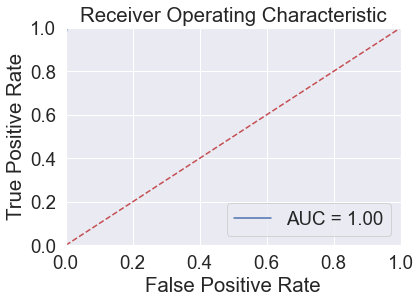

In [118]:
#Randomforest classifier
rfclass = RandomForestClassifier(random_state = 0)
rfclass.fit(X_train, y_train)

y_pred_train = rfclass.predict(X_train)
y_pred_test = rfclass.predict(X_test)

#Accuracy score
print('Accuracy score for test data using Random Forest :', accuracy_score(y_test,y_pred_test))

print('----------------------------------------------------------------------------------------')

#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for Random forest model")
print(confusion_matrix)

print('----------------------------------------------------------------------------------------')

#AUC ROC Curve
probs = rfclass.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Predicting Average Price of Avocado

In [122]:
df.drop(['Date', 'TotalVolume', 'TotalBags', 'Region', 'Year'], axis = 1,inplace = True)

In [124]:
scaler = StandardScaler().fit(df)
data_avocado_scaler = scaler.transform(df)
data_avocado = pd.DataFrame(data_avocado_scaler)
data_avocado.columns = ['AveragePrice', 'Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type']
data_avocado.head()

,AveragePrice,Small,Large,XLarge,SmallBags,LargeBags,XLargeBags,Type
0,-0.188689,-0.230816,-0.199902,-0.212091,-0.232647,-0.222352,-0.17558,-0.999836
1,-0.139020,-0.231103,-0.208054,-0.211997,-0.231568,-0.222335,-0.17558,-0.999836
2,-1.182069,-0.231007,-0.154478,-0.211325,-0.233399,-0.222311,-0.17558,-0.999836
3,-0.809551,-0.230741,-0.185350,-0.211864,-0.236568,-0.222186,-0.17558,-0.999836
4,-0.312861,-0.230891,-0.208719,-0.211834,-0.236154,-0.221924,-0.17558,-0.999836


# Model Selection

### Linear Regression

In [67]:
X=df.iloc[:,1:14]
y=df['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [127]:
feature_cols = ['Small', 'Large', 'XLarge', 'SmallBags', 'LargeBags', 'XLargeBags', 'Type']

X = data_avocado[feature_cols]
y = data_avocado.AveragePrice

In [128]:
def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [129]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (14599, 7)
y_train shape:  (14599,)

Test cases as below
X_test shape:  (3650, 7)
y_test shape:  (3650,)


In [141]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)

    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()

    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  

        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))
        
    return linreg

In [142]:
linreg = linear_reg(X,y)

In [132]:
linreg.score(X,y)

0.3980206520577072

In [133]:
print('Intercept:',linreg.intercept_)                                           # print the intercept 
print('Coefficients:',linreg.coef_)

Intercept: -0.002505711970250271
Coefficients: [-0.31332629  0.32039105 -0.12354322  0.06163263 -0.07300029  0.07633143
  0.60580356]


In [134]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

In [135]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept -0.002505711970250271
Small -0.3133262880926914
Large 0.3203910517486838
XLarge -0.12354321842178195
SmallBags 0.06163262769036363
LargeBags -0.07300028791378153
XLargeBags 0.07633142768206123
Type 0.6058035608004645


In [136]:
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

In [138]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

print('Mean Absolute Error for training set is {}'.format(MAE_train))
print('Mean Absolute Error for test set is {}'.format(MAE_test))

print('----------------------------------------------------------------------------------------')

MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

print('Mean Squared Error for training set is {}'.format(MSE_train))
print('Mean Squared Error for test set is {}'.format(MSE_test))

print('----------------------------------------------------------------------------------------')

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('Root Mean Squared Error for training set is {}'.format(RMSE_train))
print('Root Mean Squared Error for test set is {}'.format(RMSE_test))

Mean Absolute Error for training set is 0.5940526287383294
Mean Absolute Error for test set is 0.5974131265484528
----------------------------------------------------------------------------------------
Mean Squared Error for training set is 0.6023479204673671
Mean Squared Error for test set is 0.6005051588207694
----------------------------------------------------------------------------------------
Root Mean Squared Error for training set is 0.7761107655917209
Root Mean Squared Error for test set is 0.7749226792530783


In [139]:
print("Model Evaluation for Linear Regression Model")

print('----------------------------------------------------------------------------------------')

yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)

print('----------------------------------------------------------------------------------------')

yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Linear Regression Model
----------------------------------------------------------------------------------------
r_squared for train data  0.39738629390003366  and adjusted_r_squared for train data 0.39709719130646914
----------------------------------------------------------------------------------------
r_squared for test data  0.4005468712569107  and adjusted_r_squared for test data 0.3993947098342854


#### Linear Regression Model using different columns

In [143]:
feature_cols = ['Small', 'SmallBags', 'Type']
X1 = data_avocado[feature_cols]  
y1 = data_avocado.AveragePrice
linreg=linear_reg(X1,y1, gridsearch = True)

Mean cross-validated score of the best_estimator :  0.38662424075829555
RMSE for the test set is 0.6095675212451105


In [144]:
feature_cols = ['Large', 'LargeBags', 'Type']
X1 = data_avocado[feature_cols]  
y1 = data_avocado.AveragePrice
linreg=linear_reg(X1,y1, gridsearch = True)

Mean cross-validated score of the best_estimator :  0.38065568476473455
RMSE for the test set is 0.614996203316257


In [145]:
feature_cols = ['XLarge', 'XLargeBags', 'Type']
X1 = data_avocado[feature_cols]  
y1 = data_avocado.AveragePrice
linreg=linear_reg(X1,y1, gridsearch = True)

Mean cross-validated score of the best_estimator :  0.38102647934077394
RMSE for the test set is 0.6155209636844581


## Random Forest Regressor

In [146]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(random_state = 0)
model2.fit(X_train, y_train)
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test) 

In [147]:
print("Model Evaluation for Random Forest Regressor ")
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

print('----------------------------------------------------------------------------------------')

yhat = model2.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)

print('----------------------------------------------------------------------------------------')

yhat = model2.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Random Forest Regressor 
RMSE for training set is 0.17906244640182012  and RMSE for test set is 0.45826908126952465
----------------------------------------------------------------------------------------
r_squared for train data  0.9679224923517388  and adjusted_r_squared for train data 0.9679071032383444
----------------------------------------------------------------------------------------
r_squared for test data  0.7903573684164865  and adjusted_r_squared for test data 0.7899544309038329
